# Triselle's Instruction:
- See the criteria for guides
- Do data descriptions to each visualization
- Data profile (like metadata), link found below



# Why Am I Going Bald:
## 🔎 A Dive into Main Reasons of Balding

1. Data Profiling
2. Data Cleaning
3. Analysis
   - You are not alone (EDA)
   - Feature importance analysis
   - Correlation
7. Machine Learning Model

### Data Profiling:
<https://www.kaggle.com/datasets/amitvkulkarni/hair-health>

### 🧽 Data Cleaning:

**Import the necessary libraries:**

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Get a glimpse of the dataset:**

In [218]:
hair_df = pd.read_csv('datasets/hair_dataset.csv')
hair_df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


**Renamed the column names:**
- Makes the dataset consistent
- This to make working with the dataset easier

In [219]:
hair_df.columns = [col.lower().replace(' ', '_') for col in hair_df.columns]
hair_columns = hair_df.columns.to_list()

In [220]:
hair_columns[4] = 'medications_and_treatments'
hair_columns[5] = 'nutritional_deficiencies'
hair_columns[8] = 'poor_hair_care_habits'
hair_columns[11] = 'weight_loss'
hair_df.columns = hair_columns

In [221]:
hair_df.head()

,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


**Validate the category features:**
- This is important to make sure that there are no wrong data values among categorical features

In [222]:
category_df = hair_df.drop(columns = ['id', 'age'])
category_df.head()

,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,No,Yes,Yes,No,1


In [223]:
for i in category_df.columns:
    print(category_df.value_counts(i))
    print("\n")

genetics
Yes    522
No     477
Name: count, dtype: int64


hormonal_changes
Yes    509
No     490
Name: count, dtype: int64


medical_conditions
No Data                  110
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: count, dtype: int64


medications_and_treatments
Rogaine                      116
Antidepressants              110
Steroids                     107
Heart Medication             104
Accutane                     102
Antibiotics                   94
Antifungal Cream              94
Chemotherapy                  90
Blood Pressure Medication     90
Immunomodulators              90
No Data                        2
Name: count, dtype: int64


nutritional_deficiencies
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin De

From the counts above, we can infer that all the values are correct and as expected.

**Validate numerical data:**

In [224]:
print(f"Minimum value: {min(hair_df['age'])}")
print(f"Maximum value: {max(hair_df['age'])}")

Minimum value: 18
Maximum value: 50


In [225]:
print(f"Data type: {hair_df['age'].dtypes}")

Data type: int64


From the result above, it can be concluded that numerical data are all correct as it follows what's stated in the metadata.

**Encode the boolean values:**
- This makes working with Machine Learning easier for future uses

In [226]:
cols_to_convert = ['genetics', 'hormonal_changes', 'poor_hair_care_habits', 'environmental_factors', 'smoking', 'weight_loss']
hair_df[cols_to_convert] = hair_df[cols_to_convert].replace({'Yes': 1, 'No': 0}).astype(int)
hair_df.head()

C:\Users\KimSchool\AppData\Local\Temp\ipykernel_25136\3188962641.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hair_df[cols_to_convert] = hair_df[cols_to_convert].replace({'Yes': 1, 'No': 0}).astype(int)


,id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


**Load the dataset as csv:**

In [227]:
hair_df.to_csv("datasets/cleaned_hair.csv")

## You Are not Alone

### Age Distribution

In [228]:
result = hair_df.groupby('hair_loss').agg(
    age_count = ('age', 'count'),
    age_mean = ('age', 'mean'),
    age_std = ('age', 'std'),
    minimum_value = ('age', 'min'),
    first_quartile = ('age', lambda x: x.quantile(0.25)),
    second_quartile = ('age', 'median'),   # or: lambda x: x.quantile(0.5)
    third_quartile = ('age', lambda x: x.quantile(0.75)),
    maximum_value = ('age', 'max')
)
result

,age_count,age_mean,age_std,minimum_value,first_quartile,second_quartile,third_quartile,maximum_value
hair_loss,,,,,,,,
0,502,34.770916,9.592356,18,26.0,35.0,43.0,50
1,497,33.599598,9.128266,18,26.0,33.0,41.0,50


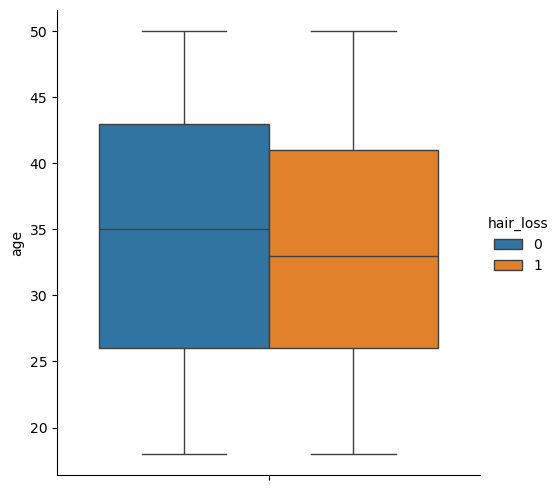

In [229]:
sns.catplot(data = hair_df, y = 'age', hue = 'hair_loss', kind = 'box')
plt.show()

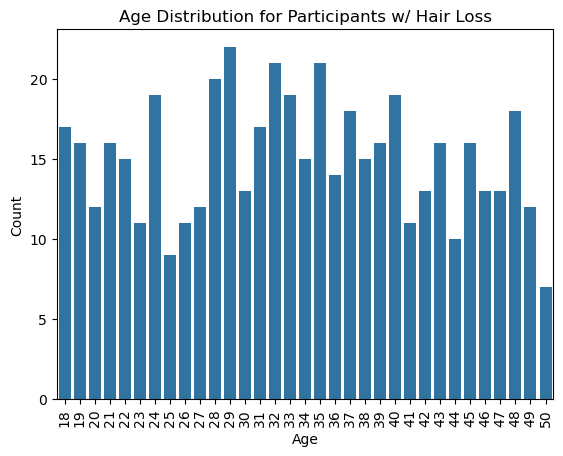

In [230]:
# Count ages manually for hair_loss = 1
age_counts = hair_df[hair_df['hair_loss'] == 1]['age'].value_counts().sort_index()

# Plot
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution for Participants w/ Hair Loss")
plt.xticks(rotation=90)
plt.show()

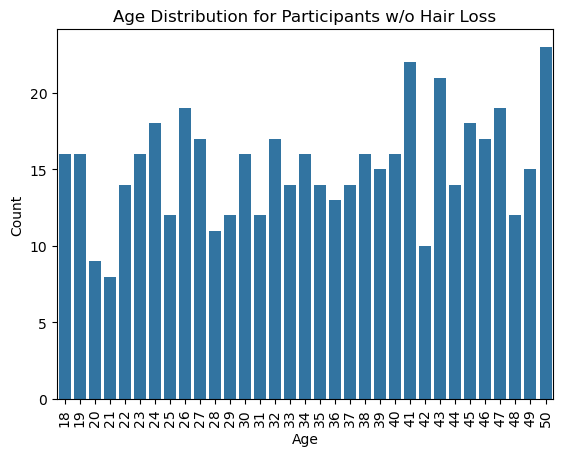

In [231]:
# Count ages manually for hair_loss = 0
age_counts = hair_df[hair_df['hair_loss'] == 0]['age'].value_counts().sort_index()

# Plot
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution for Participants w/o Hair Loss")
plt.xticks(rotation=90)
plt.show()

### ⏱️ Explore How Participants Live
- This shows how the participants in the study live, exploring their habits, and their environment.

**Subset the features that determine the lifestyle of the participants:**

In [232]:
lifestyle_df = hair_df.iloc[:, 8:13]
lifestyle_df.head()

,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,1,0
3,1,1,0,0,0
4,0,1,1,0,1


In [240]:
columns = lifestyle_df.columns.to_list()
del columns[-1]
print(columns)

['poor_hair_care_habits', 'environmental_factors', 'smoking', 'weight_loss']


In [297]:
hair_loss_count = [502, 502, 497, 497]

In [298]:
import numpy as np
pivot = (
    lifestyle_df
    .groupby('hair_loss')[columns]       
    .apply(lambda g: g.apply(pd.Series.value_counts)) 
    .astype(int)
)

percent_cols = [col + "_percent" for col in columns]

for i in range(len(columns)):
    pivot[percent_cols[i]] = pivot[columns[i]] / hair_loss_count

In [299]:
pivot

poor_hair_care_habits  environmental_factors  weight_loss  \
hair_loss                                                                
0         0                    245                    242          276   
          1                    257                    260          226   
1         0                    262                    249          251   
          1                    235                    248          246   

             poor_hair_care_habits_percent  environmental_factors_percent  \
hair_loss                                                                   
0         0                       0.488048                       0.482072   
          1                       0.511952                       0.517928   
1         0                       0.527163                       0.501006   
          1                       0.472837                       0.498994   

             weight_loss_percent  
hair_loss                         
0         0             0.549801  
          1             0.450199  
1         0             0.505030  
          1             0.494970

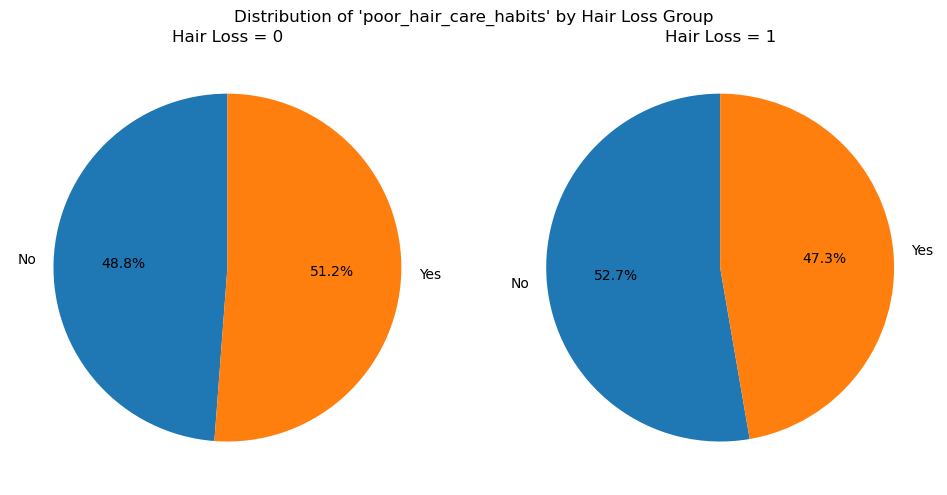

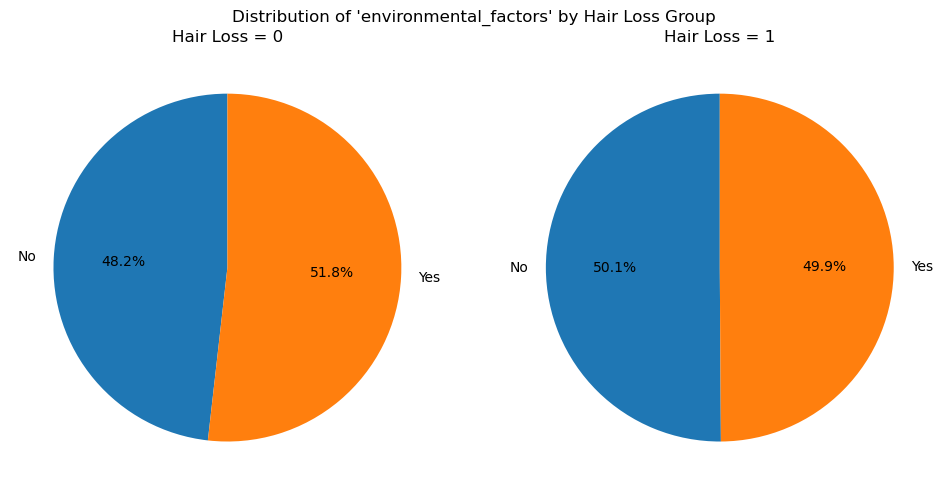

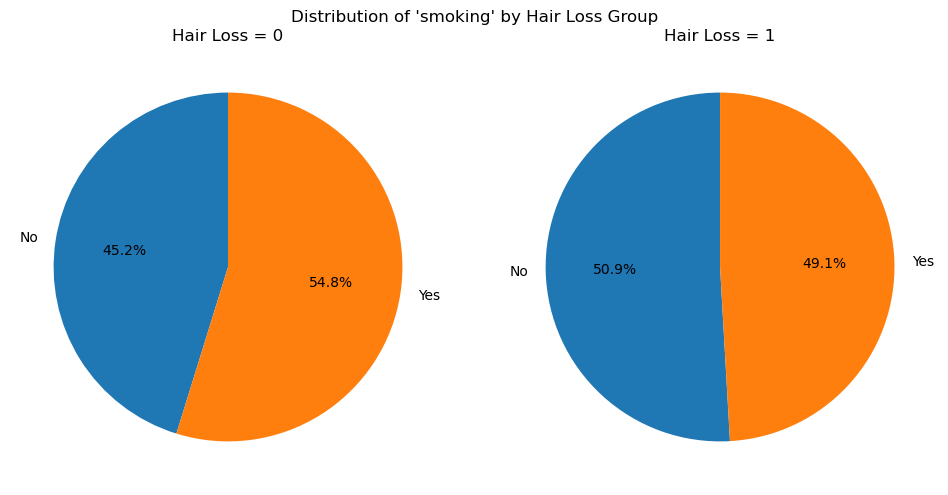

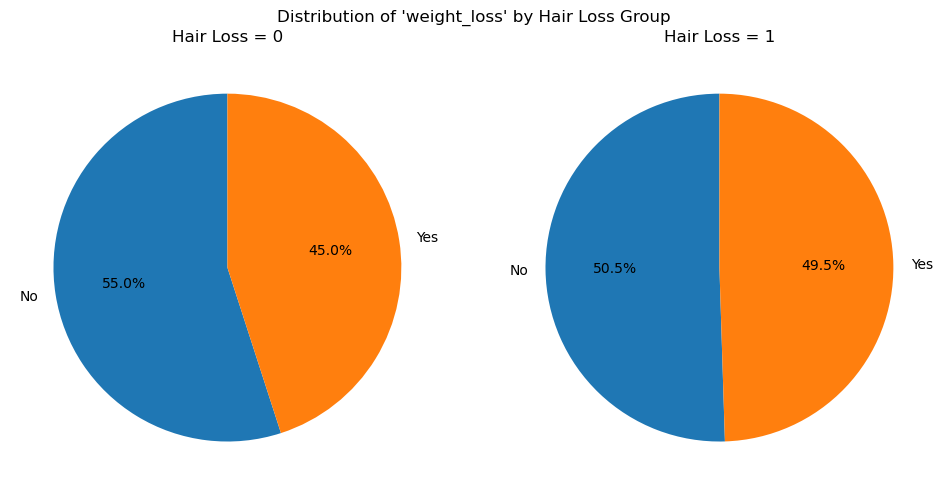

In [255]:
features = ['poor_hair_care_habits', 'environmental_factors', 'smoking', 'weight_loss']

for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Distribution of '{feature}' by Hair Loss Group")

    for i, hair_loss_val in enumerate([0, 1]):
        subset = lifestyle_df[lifestyle_df['hair_loss'] == hair_loss_val]
        counts = subset[feature].value_counts().sort_index()
        labels = ['No', 'Yes']
        axes[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Hair Loss = {hair_loss_val}')

    plt.tight_layout()
    plt.show()

### ⚕️ How Well are the Participants
- This explores the medical data recorded about the participants.

In [256]:
medical_df = hair_df.iloc[:, 1:7]
medical_df['hair_loss'] = hair_df['hair_loss']
medical_df.head()

,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,hair_loss
0,1,0,No Data,No Data,Magnesium deficiency,Moderate,0
1,0,0,Eczema,Antibiotics,Magnesium deficiency,High,0
2,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,0
3,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,0
4,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,1


In [302]:
medical_columns = medical_df.columns.to_list()
del medical_columns[2:]
pivot = (
    medical_df
    .groupby('hair_loss')[medical_columns]        
    .apply(lambda g: g.apply(pd.Series.value_counts))
    .astype(int)
)

percent_cols = [col + "_percent" for col in medical_columns]

for i in range(len(medical_columns)):
    pivot[percent_cols[i]] = pivot[medical_columns[i]] / hair_loss_count
    
pivot

genetics  hormonal_changes  genetics_percent  \
hair_loss                                                   
0         1       252               254          0.501992   
          0       250               248          0.498008   
1         1       270               255          0.543260   
          0       227               242          0.456740   

             hormonal_changes_percent  
hair_loss                              
0         1                  0.505976  
          0                  0.494024  
1         1                  0.513078  
          0                  0.486922

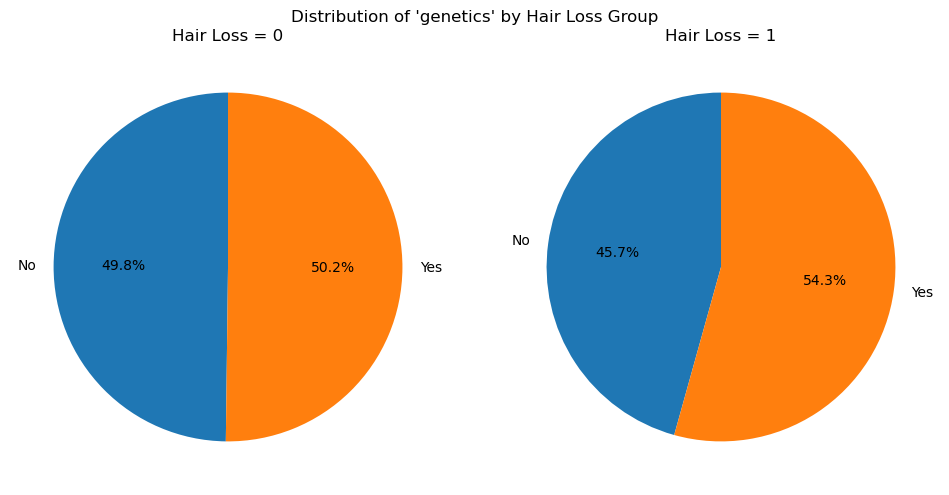

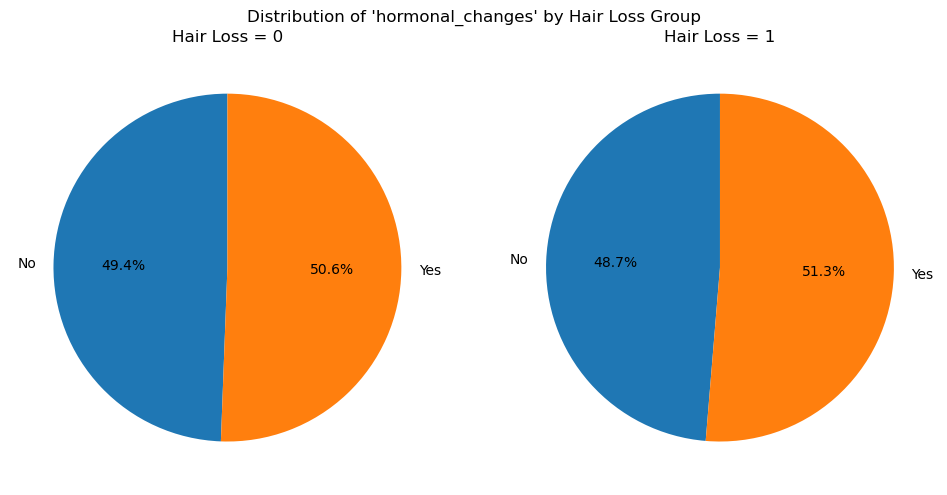

In [257]:
features = ['genetics', 'hormonal_changes']

for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Distribution of '{feature}' by Hair Loss Group")

    for i, hair_loss_val in enumerate([0, 1]):
        subset = medical_df[medical_df['hair_loss'] == hair_loss_val]
        counts = subset[feature].value_counts().sort_index()  # [0s, 1s]
        labels = ['No', 'Yes']
        axes[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Hair Loss = {hair_loss_val}')

    plt.tight_layout()
    plt.show()

In [312]:
def cross_tab(column):
    pivot = pd.crosstab(index=medical_df[column], columns=medical_df['hair_loss'])
    pivot.columns = ['No Hair Loss', 'Hair Loss']
    pivot = pivot.reset_index()
    return pivot
cross_tab('medical_conditions')

,medical_conditions,No Hair Loss,Hair Loss
0,Alopecia Areata,46,61
1,Androgenetic Alopecia,43,55
2,Dermatitis,48,44
3,Dermatosis,45,43
4,Eczema,36,33
5,No Data,63,47
6,Psoriasis,50,50
7,Ringworm,36,33
8,Scalp Infection,41,38
9,Seborrheic Dermatitis,38,50


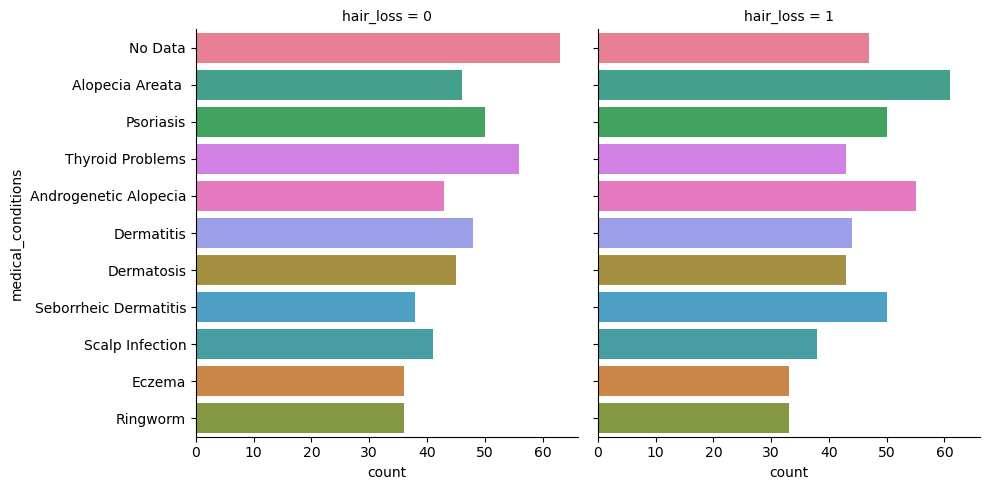

In [313]:
sns.catplot(data = medical_df, y = 'medical_conditions', col = 'hair_loss', kind = 'count', hue = 'medical_conditions', order=medical_df['medical_conditions'].value_counts().index.tolist())
plt.show()

In [314]:
cross_tab('medications_and_treatments')

,medications_and_treatments,No Hair Loss,Hair Loss
0,Accutane,52,50
1,Antibiotics,44,50
2,Antidepressants,57,53
3,Antifungal Cream,50,44
4,Blood Pressure Medication,48,42
5,Chemotherapy,44,46
6,Heart Medication,51,53
7,Immunomodulators,50,40
8,No Data,1,1
9,Rogaine,57,59


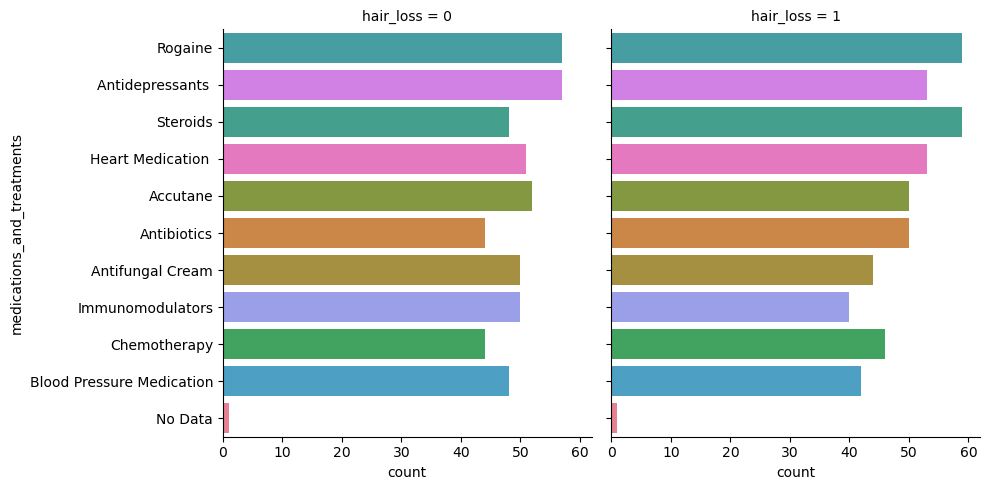

In [316]:
sns.catplot(data = medical_df, y = 'medications_and_treatments', col = 'hair_loss', kind = 'count', hue = 'medications_and_treatments', order=medical_df['medications_and_treatments'].value_counts().index.tolist())
plt.show()

In [321]:
cross_tab('nutritional_deficiencies')

,nutritional_deficiencies,No Hair Loss,Hair Loss
0,Biotin Deficiency,53,46
1,Iron deficiency,38,40
2,Magnesium deficiency,38,46
3,No Data,38,42
4,Omega-3 fatty acids,50,42
5,Protein deficiency,43,47
6,Selenium deficiency,40,42
7,Vitamin A Deficiency,48,51
8,Vitamin D Deficiency,52,52
9,Vitamin E deficiency,45,38


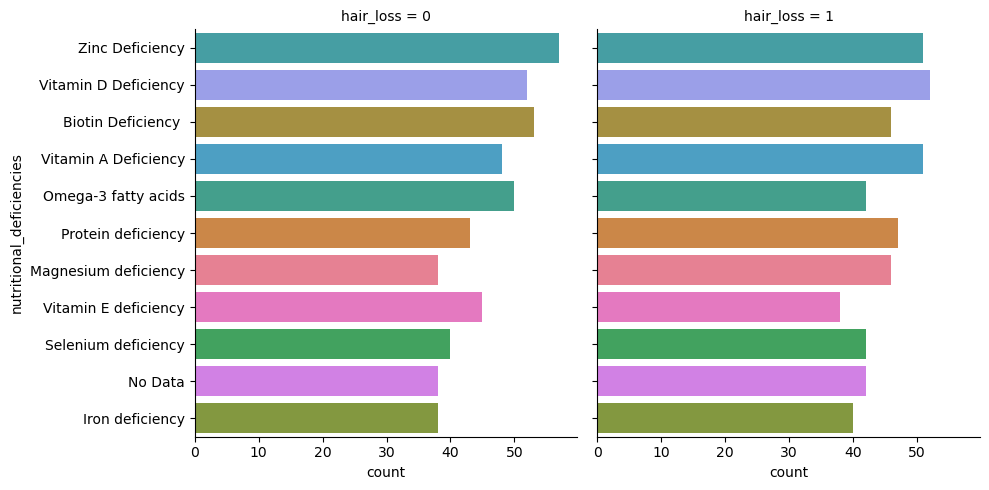

In [320]:
sns.catplot(data = medical_df, y = 'nutritional_deficiencies', col = 'hair_loss', kind = 'count', hue = 'nutritional_deficiencies', order=medical_df['nutritional_deficiencies'].value_counts().index.tolist())
plt.show()

In [319]:
cross_tab('stress')

,stress,No Hair Loss,Hair Loss
0,High,165,156
1,Low,168,159
2,Moderate,169,182


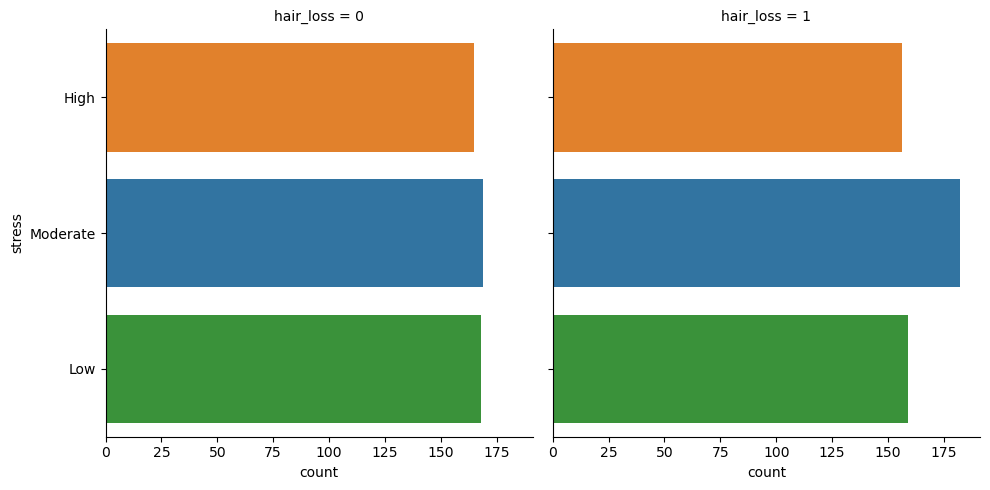

In [317]:
sns.catplot(data = medical_df, y = 'stress', col = 'hair_loss', kind = 'count', hue = 'stress', order=['High', 'Moderate', 'Low'])
plt.show()